In [69]:
import pandas as pd
import numpy as np
import os
import json
import re
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import string
from sklearn.preprocessing import StandardScaler
from scipy import stats
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from matplotlib import pyplot

In [3]:
data = pd.read_csv('metadata.csv')
data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [4]:
delete_rows = []
for row,abstract in enumerate(data.abstract):
    try:
        NLTKtokens = word_tokenize(abstract)
    except:
        delete_rows.append(row)
len(delete_rows)
        
    #NLTKtokens = [word.lower() for word in abstract]
    #NLTKwords = [word for word in NLTKtokens if word.isalpha()]

#NLTKtokens = sent_tokenize(data.abstract[0])
#NLTKwords = [word for word in NLTKtokens if word.isalpha()]
#NLTKlower = [word.lower() for word in NLTKwords]
#stop_words = set(stopwords.words('english'))
#NLTK_rm_stop_words = [words for words in NLTKlower if not words in stop_words]
#NLTK_rm_stop_words
#NLTKtokens

7861

In [5]:
for i in delete_rows:
    data.drop([i], axis = 0, inplace = True)

In [15]:
# master_docs = []
# for doc in data.abstract:
#     master_docs.append(clean(doc))

In [ ]:
# model = Word2Vec(master_docs, min_count=1)
# print(model)
# words = list(model.wv.vocab)
# print(len(words))

In [19]:
keras_tokens = Tokenizer(1000)
keras_tokens.fit_on_texts(data.abstract)
encoded_docs_TFTDF = keras_tokens.texts_to_matrix(data.abstract, mode='tfidf')
print(encoded_docs_TFTDF.shape)
print(encoded_docs_TFTDF)

(37913, 1000)
[[0.         2.0736906  2.32377288 ... 0.         0.         0.        ]
 [0.         2.45310203 2.07280839 ... 0.         0.         0.        ]
 [0.         2.45310203 2.07280839 ... 0.         0.         0.        ]
 ...
 [0.         2.45310203 2.60906721 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         2.25059632 2.32377288 ... 0.         0.         0.        ]]


In [28]:
scaler = StandardScaler()
df_std = scaler.fit_transform(encoded_docs_TFTDF) 
kmeans = KMeans(n_clusters=50)
kmeans = kmeans.fit(df_std)
labeldf = kmeans.labels_
stats.itemfreq(labeldf)

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


array([[   0,    1],
       [   1,  713],
       [   2,  746],
       [   3,  558],
       [   4, 1875],
       [   5, 1416],
       [   6, 1099],
       [   7, 1110],
       [   8,  637],
       [   9,    1],
       [  10,  545],
       [  11, 1133],
       [  12,  551],
       [  13,    2],
       [  14, 1038],
       [  15, 1048],
       [  16, 2981],
       [  17,  415],
       [  18, 3333],
       [  19,  324],
       [  20,    1],
       [  21, 1192],
       [  22,  533],
       [  23,  365],
       [  24, 1092],
       [  25,  940],
       [  26,  263],
       [  27, 1001],
       [  28,  866],
       [  29,  185],
       [  30,  169],
       [  31,  800],
       [  32,  729],
       [  33,  442],
       [  34, 1207],
       [  35,   24],
       [  36,    2],
       [  37, 1276],
       [  38,  811],
       [  39,    1],
       [  40,  638],
       [  41,    1],
       [  42,  462],
       [  43,    8],
       [  44,    1],
       [  45, 1423],
       [  46,  251],
       [  47,

In [32]:
data['clusters'] = labeldf
data[data.clusters == 43]

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url,clusters
8770,tph5n7ak,c10d2b72f8d450209946e805ba18154c9a6c5f7f,PMC,Reversal of the Progression of Fatal Coronavir...,10.1371/journal.ppat.1005531,PMC4814111,27027316.0,cc-by,Coronaviruses infect animals and humans causin...,2016-03-30,"Kim, Yunjeong; Liu, Hongwei; Galasiti Kankanam...",PLoS Pathog,NaN,NaN,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,43
17559,d8inkno4,NaN,PMC,GII.4 Norovirus Protease Shows pH-Sensitive Pr...,10.1128/jvi.01479-18,PMC6401421,30626675.0,unk,Human noroviruses (NoVs) are the main cause of...,2019-01-09,"Viskovska, Mariya A.; Zhao, Boyang; Shanker, S...",Journal of Virology,NaN,NaN,False,NaN,https://jvi.asm.org/content/jvi/93/6/e01479-18...,43
23648,jiaa6bz1,NaN,PMC,Crystal Structure of Feline Infectious Periton...,10.1128/jvi.02685-15,PMC4734010,26656689.0,unk,Coronaviruses (CoVs) can cause highly prevalen...,2015-12-09,"Wang, Fenghua; Chen, Cheng; Liu, Xuemeng; Yang...",Journal of Virology,NaN,NaN,False,NaN,https://jvi.asm.org/content/jvi/90/4/1910.full...,43
24307,fcrusu9m,NaN,PMC,A Chimeric Virus-Mouse Model System for Evalua...,10.1128/jvi.01749-14,PMC4178736,25100850.0,unk,"To combat emerging coronaviruses, developing s...",2014-08-06,"Deng, Xufang; Agnihothram, Sudhakar; Mielech, ...",Journal of Virology,NaN,NaN,False,NaN,https://jvi.asm.org/content/jvi/88/20/11825.fu...,43
26205,0kgkj906,NaN,PMC,Coronaviruses Resistant to a 3C-Like Protease ...,10.1128/jvi.01528-14,PMC4178758,25100843.0,unk,Viral protease inhibitors are remarkably effec...,2014-08-06,"Deng, Xufang; StJohn, Sarah E.; Osswald, Heath...",Journal of Virology,NaN,NaN,False,NaN,https://jvi.asm.org/content/jvi/88/20/11886.fu...,43
26462,ak7xdckg,NaN,PMC,Broad-Spectrum Inhibitors against 3C-Like Prot...,10.1128/jvi.03688-14,PMC4403489,25694593.0,unk,"Feline infectious peritonitis and virulent, sy...",2015-02-18,"Kim, Yunjeong; Shivanna, Vinay; Narayanan, San...",Journal of Virology,NaN,NaN,False,NaN,https://jvi.asm.org/content/jvi/89/9/4942.full...,43
43433,5gt5r2uu,df579575e205bcb94b108aaafb35adbdbb0ad36b; 889d...,Elsevier,Potent inhibition of feline coronaviruses with...,10.1016/j.antiviral.2012.11.005,PMC3563934,23219425.0,els-covid,Abstract Feline coronavirus infection is commo...,2013-02-28,"Kim, Yunjeong; Mandadapu, Sivakoteswara Rao; G...",Antiviral Research,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.antiviral.2012.11.005,43
44526,nc05llre,731850c43ecbc6aa4528d66761c8d9c8aa05f3d0,Elsevier,Protease inhibitors broadly effective against ...,10.1016/j.antiviral.2018.10.015,PMC6240502,30342822.0,els-covid,Abstract Ferret and mink coronaviruses typical...,2018-12-31,"Perera, Krishani Dinali; Galasiti Kankanamalag...",Antiviral Research,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.antiviral.2018.10.015,43


In [7]:
def clean(article):
    tokens = word_tokenize(article)
    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))

    # remove punctuation from each word
    # sub function susbstitutes punctuation with nothing
    stripped = [re_punc.sub('', w) for w in tokens]

    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

In [89]:
docs = []
for doc in data.abstract:
    new_string = " "
    docs.append(new_string.join(clean(doc)))

In [47]:
master_docs = []
for i,doc in enumerate(data.abstract):
    #master_docs.append(clean(doc))
    master_docs.append(TaggedDocument(words=clean(doc), tags=[str(data.index[i])]))
#TaggedDocument(words=clean(data.abstract[0]), tags = data.sha[0])

In [30]:
data.abstract[8770]

'Coronaviruses infect animals and humans causing a wide range of diseases. The diversity of coronaviruses in many mammalian species is contributed by relatively high mutation and recombination rates during replication. This dynamic nature of coronaviruses may facilitate cross-species transmission and shifts in tissue or cell tropism in a host, resulting in substantial change in virulence. Feline enteric coronavirus (FECV) causes inapparent or mild enteritis in cats, but a highly fatal disease, called feline infectious peritonitis (FIP), can arise through mutation of FECV to FIP virus (FIPV). The pathogenesis of FIP is intimately associated with immune responses and involves depletion of T cells, features shared by some other coronaviruses like Severe Acute Respiratory Syndrome Coronavirus. The increasing risks of highly virulent coronavirus infections in humans or animals call for effective antiviral drugs, but no such measures are yet available. Previously, we have reported the inhibi

In [61]:
data.abstract[3782]

'Feline coronaviruses (FCoVs) are found throughout the world. Infection with FCoV can result in a diverse range of signs from clinically inapparent infections to a highly fatal disease called feline infectious peritonitis (FIP). FIP is one of the most serious viral diseases of cats. While there is neither an effective vaccine, nor a curative treatment for FIP, a diagnostic protocol for FCoV would greatly assist in the management and control of the virus. Clinical findings in FIP are non-specific and not helpful in making a differential diagnosis. Haematological and biochemical abnormalities in FIP cases are also non-specific. The currently available serological tests have low specificity and sensitivity for detection of active infection and cross-react with FCoV strains of low pathogenicity, the feline enteric coronaviruses (FECV). Reverse transcriptase polymerase chain reaction (RT-PCR) has been used to detect FCoV and is rapid and sensitive, but results must be interpreted in the con

In [59]:
model = Doc2Vec(min_count = 3, window = 5)
model.build_vocab(master_docs)
model.train(master_docs, total_examples=model.corpus_count, epochs=100)
print(model)

Doc2Vec(dm/m,d100,n5,w5,mc3,s0.001,t3)


In [49]:
model.docvecs.count

37913

In [34]:
model.corpus_count

37913

In [60]:
new_vector = model.infer_vector(clean(data.abstract[8770]))
model.docvecs.most_similar([new_vector])

[('8770', 0.9852409362792969),
 ('3782', 0.4600374400615692),
 ('21482', 0.44840601086616516),
 ('33982', 0.4481196403503418),
 ('1220', 0.43271398544311523),
 ('1568', 0.4323829114437103),
 ('44430', 0.42544665932655334),
 ('20407', 0.42329058051109314),
 ('4736', 0.42135369777679443),
 ('7433', 0.4194107949733734)]

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


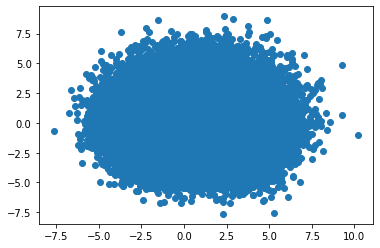

In [70]:
X = model.docvecs.doctag_syn0
pca = PCA(n_components=2)

result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])